In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')

# NETFLIX DATA

**Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is an EDA or a story telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.**

In [2]:
df = pd.read_csv(r"C:\Users\avira\MOVIE\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
2020 data is also there but it is not complete

In [3]:
print("This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataset has 7787 rows and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.duration.head()

0    4 Seasons
1       93 min
2       78 min
3       80 min
4      123 min
Name: duration, dtype: object

We can see movie length and season of shows have been mixed in one column.  
We should make different season count columns to get more insights

In [8]:
df['season_count'] = df['duration'].apply(lambda x: x.split(' ')[0] if 'Seasons' in x else ' ')

In [9]:
print("No of unique release years {} and unique countries {}".format(df.release_year.nunique(),df.country.nunique()))

No of unique release years 73 and unique countries 681


In [10]:
i = df[df['title']=='แผนร้ายนายเจ้าเล่ห์'].index
df.drop(i,inplace=True)
# dropping this movie for the dataset

In [34]:
#count of movies based on ratings
df.groupby('rating').type.value_counts()

rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       5
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     658
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1018
TV-PG     Movie       505
          TV Show     301
TV-Y      TV Show     163
          Movie       117
TV-Y7     TV Show     176
          Movie        95
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
Name: type, dtype: int64

In [11]:
df['country'].tail()

7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, dtype: object

In [12]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

This looks better and easy to read as compared to other rating basis

# DATA VISUALISATION

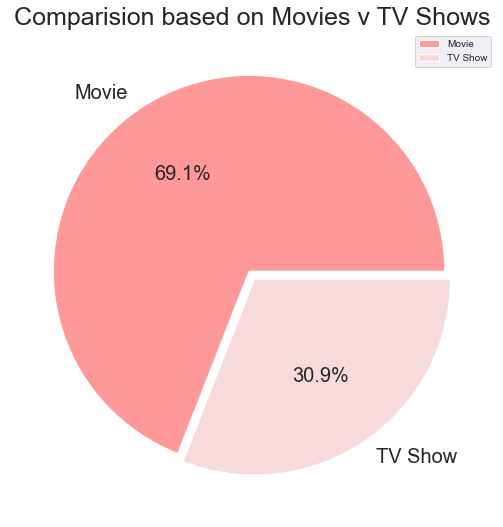

In [13]:
plt.figure(figsize = (12,9))
colors =['#ff9999','#f7dada']
df['type'].value_counts().plot.pie(colors = colors,autopct='%0.1f%%',  explode=(0.025,0.025),fontsize = 20)
plt.legend()
plt.axis('Off')
plt.title("Comparision based on Movies v TV Shows",fontsize = 25)
plt.show()

Text(0.5, 1.0, 'Movies VS Tv shows')

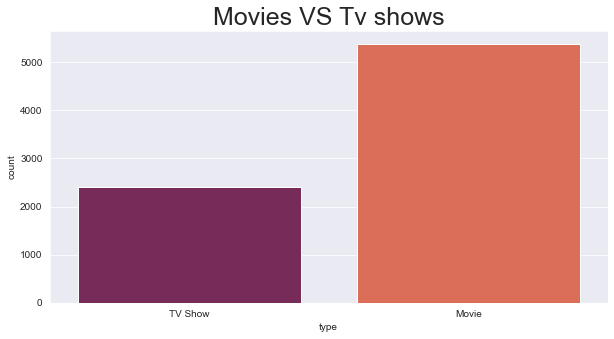

In [14]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='type',data=df,palette='rocket')
ax.set_title('Movies VS Tv shows', fontsize=25)

It is evident that Netflix has more number of movies than Tv-Shows.  
There are twice more movies on netflix than Tv Shows.

Text(0.5, 1.0, 'New releases in the multiple years')

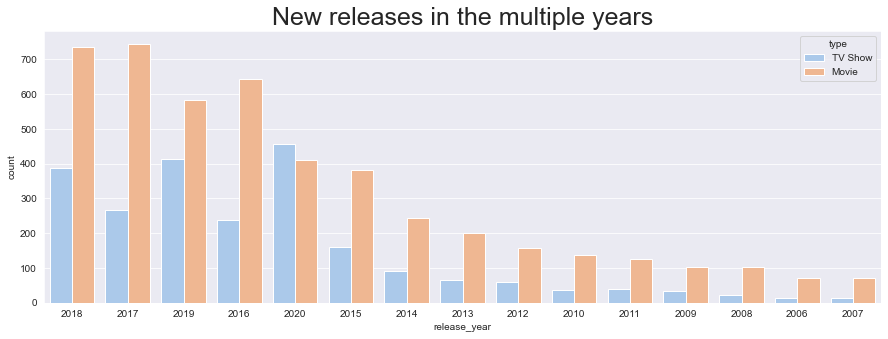

In [15]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x='release_year',hue='type',data=df,
                  order= df['release_year'].value_counts().index[0:15], palette="pastel")
ax.set_title('New releases in the multiple years', fontsize=25)

Text(0.5, 1.0, 'Most productive countries')

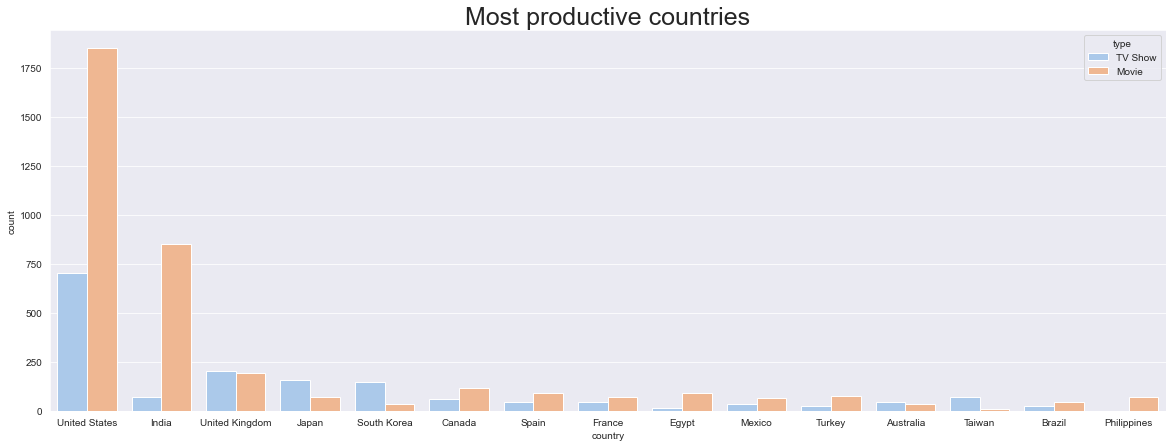

In [16]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x="country", hue="type", data=df, 
                   order= df['country'].value_counts().index[0:15], palette = 'pastel')
ax.set_title('Most productive countries', fontsize=25)


USA tops netflix charts with most number of movies followed by India and United Kingdoms.  
In recent years South Korea has also started making great number of movies on netflix and amazing content.

Text(0.5, 1.0, 'Count of movies based on ratings')

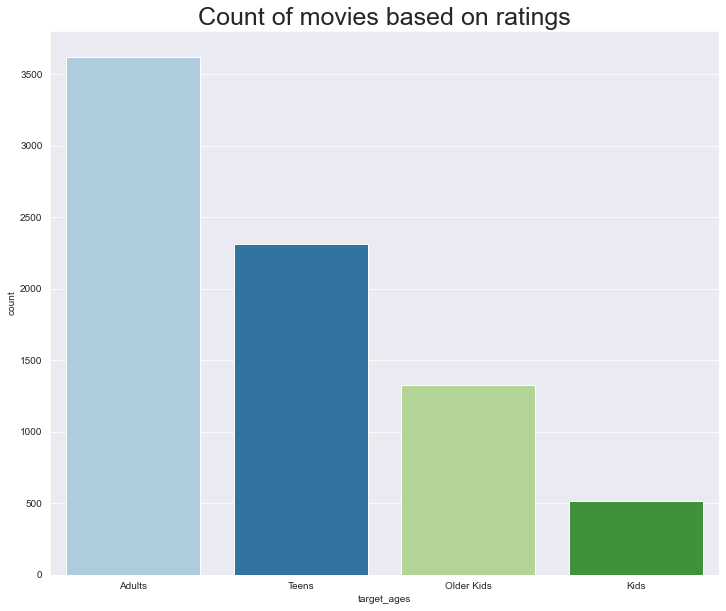

In [17]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x='target_ages',data=df,palette='Paired',order=df['target_ages'].value_counts().index[0:4])
ax.set_title('Count of movies based on ratings', fontsize=25)

Most of the movies are for adults and teens.  
Netflix does not contain many children movies.

Text(0.5, 1.0, 'Genre Comparision')

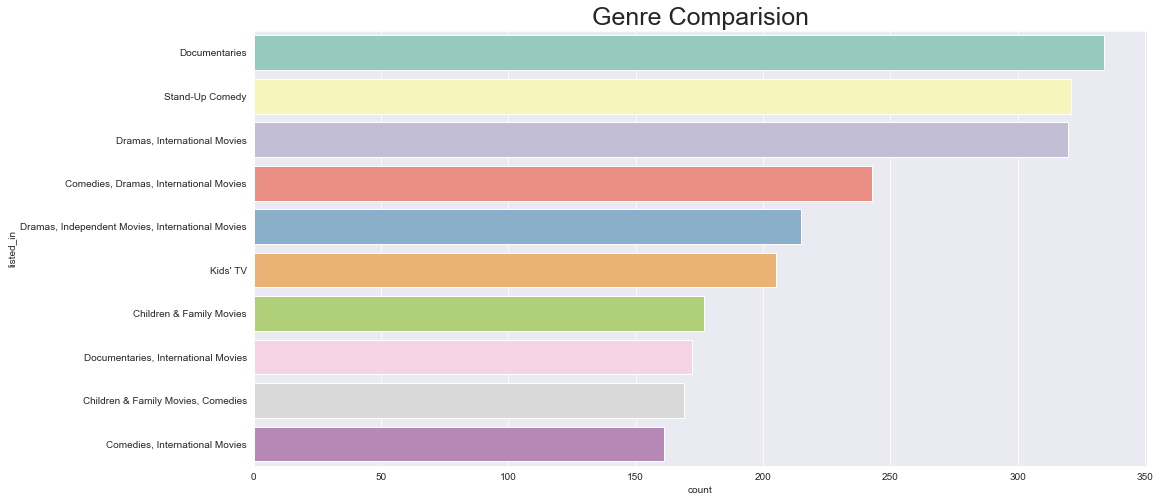

In [18]:
plt.figure(figsize=(16,8))  
ax = sns.countplot(y=df['listed_in'],order=df['listed_in'].value_counts().index[:10],palette="Set3")
ax.set_title('Genre Comparision', fontsize=25)

Text(0.5, 1.0, 'Ratings')

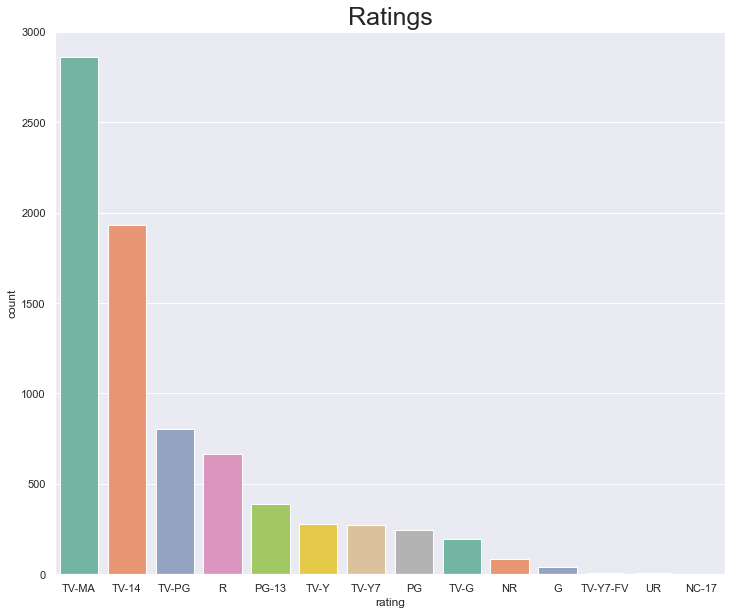

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])
ax.set_title('Ratings', fontsize=25)

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.  
Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.  
Third largest is the very popular 'R' rating.

# MOVIE RECOMENDATION SYSTEM

**CONTENT BASED FILTERING**

Content based filtering on the following factors:

1. Title
2. Cast
3. Director
4. Listed in
5. Plot

We are basically taking 5 metrix into our consideration for recommendations.

CountVectorizer tokenizes the text along with performing very basic preprocessing like removing the punctuation marks, converting all the words to lowercase, etc.The vocabulary of known words is formed which is also used for encoding unseen text later.

In [20]:
filledna=df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,target_ages
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,,Adults


In [21]:
# making all the letters lower case 
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [22]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [23]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


Creating a "soup" or a "bag of words" for all rows.

The Bag of Words is a method often used for document classification. This method turns text into fixed-length vectors by simply counting the number of times a word appears in a document, a process referred to as vectorization.

In [24]:
def bag_of_words(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [25]:
filledna['soup'] = filledna.apply(bag_of_words, axis=1)

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

Stopwords are basicaly those words which dont add much meaning during process of sentences.
Words like is,the,and,or,etc are termed as stopwords.

So we basicaly remove stopwords.

In [26]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [27]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [28]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [29]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

As you can see the movie recommendation of PK include 3 idiots,taare zammen par,Dostana,etc. Not only these are comedy movies like pk  
but some of them are also Amir Khan movies which is a great recommendation for someone who likes PK as all
these movies have comedy baseline.

In [30]:
get_recommendations_new('Men in Black', cosine_sim2)

4032                          Men in Black II
7623                           Wild Wild West
5673                           Small Soldiers
1102                                   Bright
5632                              Singularity
627     Austin Powers: The Spy Who Shagged Me
1741               Di Renjie zhi Sidatianwang
2586                  Halo: The Fall of Reach
4456                                     Next
6889                     The Space Between Us
Name: title, dtype: object

Most of the movies recommended are action movies starring Will Smith which is same as Men in Black.

In [31]:
get_recommendations_new('College Romance', cosine_sim2)

2168                                        Find Yourself
1590                                       Dancing Angels
4024                     Melodies of Life - Born This Way
2429                                         Girls Hostel
3676                                        Little Things
1435    Club Friday To Be Continued - My Beautiful Tomboy
5219                                           Rishta.com
294                                  Accidentally in Love
720                                     Bangkok Bachelors
2056                                         Ex-Boyfriend
Name: title, dtype: object

College Romance is a show which has themes of love,friendship,college life,etc and we the movies that are recommended 
such as Find youself,little things and other movies fall uther same category.